In [55]:
from pandas import *
from numpy import *
import bamboolib

In [155]:
data=read_csv('rurales20_9_5_2022.csv')
data.loc[data['ingreso mensual']<=35000].to_csv('rurales_filtrado_ingreso.csv')


In [156]:
data2=read_csv('autoconsumo20_6_5_2022.csv')
data2.loc[data['ingreso mensual']<=35000].to_csv('rurales_autoconsumo_filtrado_ingreso.csv')


In [157]:
data2['ingreso ']

array(['folioviv', 'foliohog', 'autocons', '15 o menos', '16-29', '30-59',
       '60 o mas', 'numren', 'ubica_geo', 'tam_loc', 'est_socio',
       'est_dis', 'upm', 'factor', 'clase_hog', 'sexo_jefe', 'edad_jefe',
       'educa_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'p12_64', 'p65mas', 'ocupados', 'percep_ing',
       'perc_ocupa', 'ing_cor', 'ingtrab', 'trabajo', 'sueldos',
       'horas_extr', 'comisiones', 'aguinaldo', 'indemtrab', 'otra_rem',
       'remu_espec', 'negocio', 'noagrop', 'industria', 'comercio',
       'servicios', 'agrope', 'agricolas', 'pecuarios', 'reproducc',
       'pesca', 'otros_trab', 'rentas', 'utilidad', 'arrenda', 'transfer',
       'jubilacion', 'becas', 'donativos', 'remesas', 'bene_gob',
       'transf_hog', 'trans_inst', 'estim_alqu', 'otros_ing', 'gasto_mon',
       'alimentos', 'ali_dentro', 'cereales', 'carnes', 'pescado',
       'leche', 'huevo', 'aceites', 'tuberculo', 'verduras', 'frutas',
       'azucar', 'cafe', 

In [57]:
ingresos_rurales=data.filter(['Region','tipo_hogar','CUmun2','ingreso mensual']).round(2)

In [4]:
ingresos_rurales.groupby(['Region','CUmun2']).describe().round(2)

              ingreso mensual                                                  \
                        count      mean       std      min      25%       50%   
Region CUmun2                                                                   
Centro 0                 93.0  14600.16   9378.00  1262.27  8018.96  13348.52   
       1               4200.0  14582.05  14621.69   717.39  7059.30  11040.16   
       2                648.0  13697.34  10456.95  1593.04  6712.96  10729.41   
       3               4466.0  12508.88  13756.40   532.78  6275.52   9737.51   
       4               1658.0  11101.97   9774.27   879.27  5122.90   8401.54   
Norte  1               1154.0  16839.67  22563.16  1255.29  7712.92  12164.08   
       2                 22.0  11196.68   6296.55  1399.32  6339.88  11904.54   
       3               6888.0  14754.59  51620.59   300.00  6415.53  10273.48   
       4               4146.0  14188.56  22037.42     0.00  6289.20  10119.59   
Sur    1                626.

In [5]:
ingresos_rurales.mode()

  Region            tipo_hogar  CUmun2  ingreso mensual
0  Norte  Sin ingresos propios       3          5663.39

In [58]:
from matplotlib.pyplot import *

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

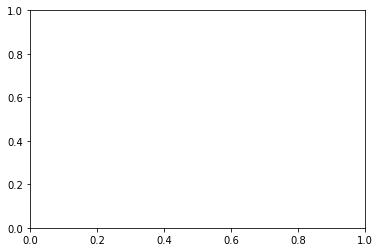

In [7]:
plot(qcut(ingresos_rurales['ingreso mensual'],10).values,ingresos_rurales['ingreso mensual'].values)

In [8]:
ingresos_rurales.groupby(qcut(ingresos_rurales['ingreso mensual'],10)).describe().round(2)

                         CUmun2                                       \
                          count  mean   std  min  25%  50%  75%  max   
ingreso mensual                                                        
(-0.001, 3645.728]       2992.0  3.15  0.92  0.0  3.0  3.0  4.0  4.0   
(3645.728, 5095.498]     2992.0  3.04  0.97  0.0  3.0  3.0  4.0  4.0   
(5095.498, 6427.774]     2992.0  2.89  1.00  0.0  3.0  3.0  4.0  4.0   
(6427.774, 7805.05]      2997.0  2.88  1.01  0.0  3.0  3.0  4.0  4.0   
(7805.05, 9361.33]       2987.0  2.82  1.05  0.0  3.0  3.0  4.0  4.0   
(9361.33, 11184.422]     2992.0  2.77  1.06  0.0  3.0  3.0  3.0  4.0   
(11184.422, 13590.062]   2992.0  2.77  1.06  0.0  2.0  3.0  3.0  4.0   
(13590.062, 17197.118]   2992.0  2.68  1.10  0.0  1.0  3.0  3.0  4.0   
(17197.118, 23692.369]   2992.0  2.69  1.10  0.0  1.0  3.0  3.0  4.0   
(23692.369, 3567369.13]  2992.0  2.66  1.11  0.0  1.0  3.0  3.0  4.0   

                        ingreso mensual                        

In [24]:
T7=data.filter(['Region','folioviv','ingreso mensual','tipo_hogar'])

In [25]:
T7['rango_ingresos_1']=cut(T7['ingreso mensual'],400)

<AxesSubplot:xlabel='rango_ingresos_1'>

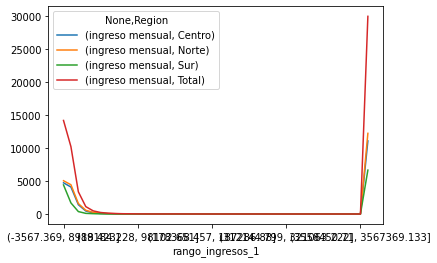

In [11]:
T7.filter(['ingreso mensual','Region','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='Region',aggfunc='count',margins=True, margins_name='Total').fillna(0).loc[:'Total'].plot()

<AxesSubplot:xlabel='rango_ingresos_1'>

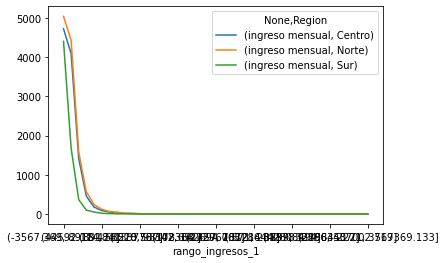

In [12]:
T7.filter(['ingreso mensual','Region','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='Region',aggfunc='count').fillna(0).plot()

<Figure size 432x288 with 0 Axes>

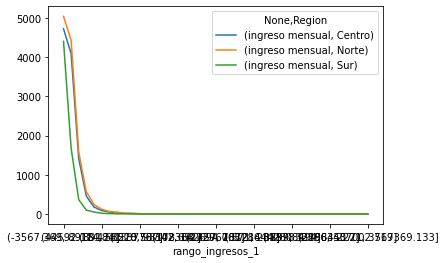

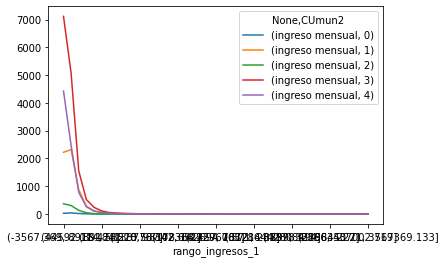

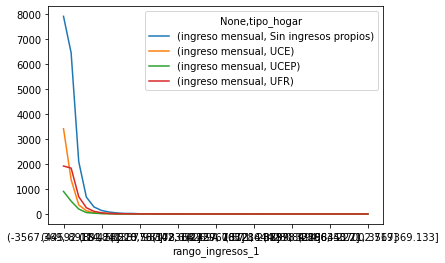

In [76]:
figure()
ingresos_rurales['rango_ingresos_1']=cut(T7['ingreso mensual'],400)
ingresos_rurales.filter(['ingreso mensual','Region','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='Region',aggfunc='count').fillna(0).plot()
savefig('distribucion_ingresos por region.png')
ingresos_rurales.filter(['ingreso mensual','CUmun2','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='CUmun2',aggfunc='count').fillna(0).plot()
savefig('distribucion_ingresos por ubicacion.png')
ingresos_rurales.filter(['ingreso mensual','tipo_hogar','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='tipo_hogar',aggfunc='count').fillna(0).plot()
savefig('distribucion_ingresos por tipo de hohgar.png')

In [16]:
T7.

       Region    folioviv  ingreso mensual       rango_ingresos_1
0      Centro   160009403     16203.990000  (8918.423, 17836.846]
1      Centro   160009407     10305.463333  (8918.423, 17836.846]
2      Centro   160009411      6900.413333  (-3567.369, 8918.423]
3      Centro   160009415     16267.646667  (8918.423, 17836.846]
4      Centro   160009419     11449.063333  (8918.423, 17836.846]
...       ...         ...              ...                    ...
29915   Norte  3260770714      4742.616667  (-3567.369, 8918.423]
29916   Norte  3260770715      4626.223333  (-3567.369, 8918.423]
29917   Norte  3260770716      6701.613333  (-3567.369, 8918.423]
29918   Norte  3260770717      8655.733333  (-3567.369, 8918.423]
29919   Norte  3260770718     15138.386667  (8918.423, 17836.846]

[29920 rows x 4 columns]

In [17]:
T7.filter(['ingreso mensual','Region','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='Region',aggfunc='count',margins=True, margins_name='Total').fillna(0)

                          ingreso mensual                        
Region                             Centro    Norte     Sur  Total
rango_ingresos_1                                                 
(-3567.369, 8918.423]              4721.0   5038.0  4400.0  14159
(8918.423, 17836.846]              4085.0   4430.0  1677.0  10192
(17836.846, 26755.269]             1409.0   1584.0   366.0   3359
(26755.269, 35673.691]              454.0    566.0    99.0   1119
(35673.691, 44592.114]              179.0    244.0    51.0    474
(44592.114, 53510.537]               88.0    121.0    19.0    228
(53510.537, 62428.96]                51.0     66.0    11.0    128
(62428.96, 71347.383]                20.0     48.0     4.0     72
(71347.383, 80265.806]               16.0     22.0     5.0     43
(80265.806, 89184.228]               11.0     18.0     4.0     33
(89184.228, 98102.651]                5.0      9.0     1.0     15
(98102.651, 107021.074]               5.0      7.0     2.0     14
(107021.07

In [27]:
T7['rango_ingresos_2']=cut(T7['ingreso mensual'],20)

In [18]:
T7['rango_ingresos_1']=cut(T7['ingreso mensual'],400)

In [22]:
T7

       Region    folioviv  ingreso mensual         rango_ingresos_2  \
0      Centro   160009403     16203.990000  (-3567.369, 178368.457]   
1      Centro   160009407     10305.463333  (-3567.369, 178368.457]   
2      Centro   160009411      6900.413333  (-3567.369, 178368.457]   
3      Centro   160009415     16267.646667  (-3567.369, 178368.457]   
4      Centro   160009419     11449.063333  (-3567.369, 178368.457]   
...       ...         ...              ...                      ...   
29915   Norte  3260770714      4742.616667  (-3567.369, 178368.457]   
29916   Norte  3260770715      4626.223333  (-3567.369, 178368.457]   
29917   Norte  3260770716      6701.613333  (-3567.369, 178368.457]   
29918   Norte  3260770717      8655.733333  (-3567.369, 178368.457]   
29919   Norte  3260770718     15138.386667  (-3567.369, 178368.457]   

            rango_ingresos_1  
0      (8918.423, 17836.846]  
1      (8918.423, 17836.846]  
2      (-3567.369, 8918.423]  
3      (8918.423, 17836

In [22]:
T7.filter(['ingreso mensual','Region','rango_ingresos_2']).pivot_table(index='rango_ingresos_2',columns='Region',aggfunc='count',margins=True, margins_name='Total').fillna(0)

                           ingreso mensual                        
Region                              Centro    Norte     Sur  Total
rango_ingresos_2                                                  
(-3567.369, 178368.457]            11059.0  12183.0  6645.0  29887
(178368.457, 356736.913]               5.0     20.0     0.0     25
(356736.913, 535105.37]                0.0      3.0     0.0      3
(535105.37, 713473.827]                1.0      1.0     0.0      2
(713473.827, 891842.283]               0.0      1.0     0.0      1
(1962053.023, 2140421.48]              0.0      1.0     0.0      1
(3389000.677, 3567369.133]             0.0      1.0     0.0      1
Total                              11065.0  12210.0  6645.0  29920

In [24]:
T7.loc[T7['ingreso mensual']<=300000].filter(['ingreso mensual','Region','rango_ingresos_2']).pivot_table(index='rango_ingresos_2',columns='Region',aggfunc='count',margins=True, margins_name='Total').fillna(0)

                         ingreso mensual                        
Region                            Centro    Norte     Sur  Total
rango_ingresos_2                                                
(-3567.369, 178368.457]          11059.0  12183.0  6645.0  29887
(178368.457, 356736.913]             3.0     18.0     0.0     21
Total                            11062.0  12201.0  6645.0  29908

In [26]:
T7.loc[T7['ingreso mensual']<=300000]['ingreso mensual'].mean()

12535.844394810712

In [21]:
T7.loc[T7['ingreso mensual']<=10000].filter(['ingreso mensual','tipo_hogar','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='tipo_hogar',aggfunc='count').fillna(0)#.plot.hist()

KeyError: 'tipo_hogar'

In [15]:
T7

       Region    folioviv  ingreso mensual
0      Centro   160009403     16203.990000
1      Centro   160009407     10305.463333
2      Centro   160009411      6900.413333
3      Centro   160009415     16267.646667
4      Centro   160009419     11449.063333
...       ...         ...              ...
29915   Norte  3260770714      4742.616667
29916   Norte  3260770715      4626.223333
29917   Norte  3260770716      6701.613333
29918   Norte  3260770717      8655.733333
29919   Norte  3260770718     15138.386667

[29920 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

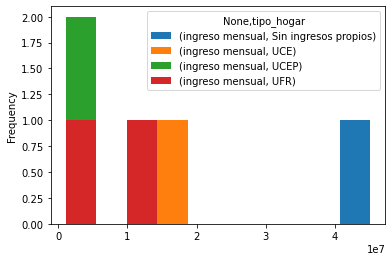

In [50]:
ingresos_rurales.loc[ingresos_rurales['ingreso mensual']<=10000].filter(['ingreso mensual','tipo_hogar','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='tipo_hogar',aggfunc=sum).fillna(0).plot.hist()

<AxesSubplot:ylabel='Frequency'>

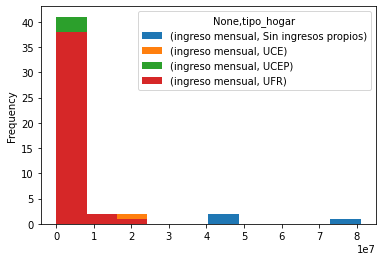

In [51]:
ingresos_rurales.filter(['ingreso mensual','tipo_hogar','rango_ingresos_1']).pivot_table(index='rango_ingresos_1',columns='tipo_hogar',aggfunc=sum).fillna(0).plot.hist()

In [59]:
T8=ingresos_rurales.loc[ingresos_rurales['ingreso mensual']<=35000].pivot_table(index=['Region','CUmun2'],columns='tipo_hogar',aggfunc=[mean],margins=True,margins_name='Total').astype(float).round(2).fillna(0).rename(index={0:'Mixtas',1:'Cercano a ciudad',2:'Cercano a mixta',3:'Cercano a carretera',4:'Aisladas'})


In [60]:
T8=T8.droplevel(axis=1,level=0)

In [63]:
t10=ingresos_rurales.loc[ingresos_rurales['ingreso mensual']<=35000]

In [64]:
t10

       Region            tipo_hogar  CUmun2  ingreso mensual
0      Centro  Sin ingresos propios       1         16203.99
1      Centro  Sin ingresos propios       1         10305.46
2      Centro  Sin ingresos propios       1          6900.41
3      Centro                   UFR       1         16267.65
4      Centro                   UFR       1         11449.06
...       ...                   ...     ...              ...
29915   Norte  Sin ingresos propios       3          4742.62
29916   Norte                   UFR       3          4626.22
29917   Norte  Sin ingresos propios       3          6701.61
29918   Norte  Sin ingresos propios       3          8655.73
29919   Norte  Sin ingresos propios       3         15138.39

[28786 rows x 4 columns]

In [61]:
T8=T8.rename(columns={'ingreso mensual':'Ingreso mensual promedio'})

In [52]:
T8.to_excel('Ingreso corriente mensual_ponderado_por tipo de hogar por region y ubicacion_2020.xls')

In [33]:
T8.columns = ["_".join([str(index) for index in multi_index]) for multi_index in T8.columns.ravel()]
T8 = T8.reset_index()
T8

                           Ingreso mensual promedio                      \
tipo_hogar                     Sin ingresos propios       UCE      UCEP   
Region CUmun2                                                             
Centro Mixtas                              15121.92  12588.85      0.00   
       Cercano a ciudad                    13818.66  13006.43  15092.23   
       Cercano a mixta                     13101.77   9899.58  17801.66   
       Cercano a carretera                 11706.49  11875.44  14001.95   
       Aisladas                            11111.05  10080.50  12066.50   
Norte  Cercano a ciudad                    15457.97  11252.79  16415.20   
       Cercano a mixta                     10310.28  12048.03      0.00   
       Cercano a carretera                 13075.91  12030.44  14147.07   
       Aisladas                            13311.55  10040.55  14576.24   
Sur    Cercano a ciudad                    11146.21  10215.49  12334.90   
       Cercano a mixta   

In [53]:
T9=ingresos_rurales.loc[ingresos_rurales['ingreso mensual']<=35000].pivot_table(index=['Region','CUmun2'],columns='tipo_hogar',aggfunc=[mean],margins=True,margins_name='Total').astype(float).round(2).fillna(0).rename(index={0:'Mixtas',1:'Cercano a ciudad',2:'Cercano a mixta',3:'Cercano a carretera',4:'Aisladas'})


In [54]:

T9.columns = ["_".join([str(index) for index in multi_index]) for multi_index in T9.columns.ravel()]
T9 = T9.reset_index()
T9

                                           mean                                \
                                ingreso mensual                                 
tipo_hogar                 Sin ingresos propios       UCE      UCEP       UFR   
Region CUmun2                                                                   
Centro Mixtas                          13916.16  12588.85      0.00  12405.79   
       Cercano a ciudad                12244.65  11290.24  12052.00  13021.09   
       Cercano a mixta                 12021.10   9899.58  14691.62  13985.48   
       Cercano a carretera             10887.36  10628.44  11886.69  12198.09   
       Aisladas                        10198.97   8972.59  10513.32  10868.41   
Norte  Cercano a ciudad                13284.65  11252.79  13872.81  12766.11   
       Cercano a mixta                 10310.28  12048.03      0.00  12530.66   
       Cercano a carretera             11404.80  10329.11  12290.71  13139.76   
       Aisladas             

In [48]:
T7.loc[ingresos_rurales['ingreso mensual']<=35000]

       Region    folioviv  ingreso mensual            tipo_hogar  \
0      Centro   160009403     16203.990000  Sin ingresos propios   
1      Centro   160009407     10305.463333  Sin ingresos propios   
2      Centro   160009411      6900.413333  Sin ingresos propios   
3      Centro   160009415     16267.646667                   UFR   
4      Centro   160009419     11449.063333                   UFR   
...       ...         ...              ...                   ...   
29915   Norte  3260770714      4742.616667  Sin ingresos propios   
29916   Norte  3260770715      4626.223333                   UFR   
29917   Norte  3260770716      6701.613333  Sin ingresos propios   
29918   Norte  3260770717      8655.733333  Sin ingresos propios   
29919   Norte  3260770718     15138.386667  Sin ingresos propios   

            rango_ingresos_1         rango_ingresos_2  
0      (8918.423, 17836.846]  (-3567.369, 178368.457]  
1      (8918.423, 17836.846]  (-3567.369, 178368.457]  
2      (-3567.3

In [37]:
T7

       Region    folioviv  ingreso mensual            tipo_hogar  \
0      Centro   160009403     16203.990000  Sin ingresos propios   
1      Centro   160009407     10305.463333  Sin ingresos propios   
2      Centro   160009411      6900.413333  Sin ingresos propios   
3      Centro   160009415     16267.646667                   UFR   
4      Centro   160009419     11449.063333                   UFR   
...       ...         ...              ...                   ...   
29915   Norte  3260770714      4742.616667  Sin ingresos propios   
29916   Norte  3260770715      4626.223333                   UFR   
29917   Norte  3260770716      6701.613333  Sin ingresos propios   
29918   Norte  3260770717      8655.733333  Sin ingresos propios   
29919   Norte  3260770718     15138.386667  Sin ingresos propios   

            rango_ingresos_1         rango_ingresos_2  
0      (8918.423, 17836.846]  (-3567.369, 178368.457]  
1      (8918.423, 17836.846]  (-3567.369, 178368.457]  
2      (-3567.3

In [68]:
T11= data.loc[data['ingreso mensual']<=35000]

In [89]:
T11.filter(['factor','Region','tocupa','CUmun2','tipo_hogar'])['factor'].sum()

6136149

In [92]:
T12=T11.filter(['factor','Region','tocupa','CUmun2','tipo_hogar','ingreso mensual', 
       'ingtrab', 'trabajo', 'sueldos', 'horas_extr', 'comisiones',
       'aguinaldo', 'indemtrab', 'otra_rem', 'remu_espec', 'negocio',
       'noagrop', 'industria', 'comercio', 'servicios', 'agrope',
       'agricolas', 'pecuarios', 'reproducc', 'pesca', 'otros_trab',
       'rentas', 'utilidad', 'arrenda', 'transfer', 'jubilacion', 'becas',
       'donativos', 'remesas', 'bene_gob', 'transf_hog', 'trans_inst',
       'estim_alqu', 'otros_ing']).groupby(['Region','tipo_hogar','CUmun2']).describe()

In [128]:
T13=T11.filter(['Region','CUmun2','tipo_hogar','ingreso mensual', 
       'ingtrab', 'trabajo', 'sueldos', 'horas_extr', 'comisiones',
       'aguinaldo', 'indemtrab', 'otra_rem', 'remu_espec', 'negocio',
       'noagrop', 'industria', 'comercio', 'servicios', 'agrope',
       'agricolas', 'pecuarios', 'reproducc', 'pesca', 'otros_trab',
       'rentas', 'utilidad', 'arrenda', 'transfer', 'jubilacion', 'becas',
       'donativos', 'remesas', 'bene_gob', 'transf_hog', 'trans_inst',
       'estim_alqu', 'otros_ing']).groupby(['tipo_hogar'])

In [150]:
for i in DataFrame(T13)[0]:
    print(i)
    T13.get_group(i).pivot_table(index=['Region', 'CUmun2'],aggfunc=mean).round(2).to_excel(i+'_ingresos_por_region_y_tipo_de_hogar.xls')

Sin ingresos propios
UCE
UCEP
UFR
